In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Cleaned_Algerian_forest_fires_dataset.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


**NOTE:** Refer to "Data_cleaning&EDA.ipynb" for ease of understanding

In [3]:
df.drop(labels=['day','month','year'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [5]:
#Encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


#### Independent [X] and Dependent [y] features Selection

In [7]:
X=df.drop(labels='FWI',axis=1)
y=df['FWI']

In [8]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [9]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

#### Train-Test data Split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [11]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

#### Feature Selection based on Correlation

In [12]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


  Check for **multicollinarity**

Text(0.5, 1.0, 'multicollinarity in Algerian forest fires dataset ')

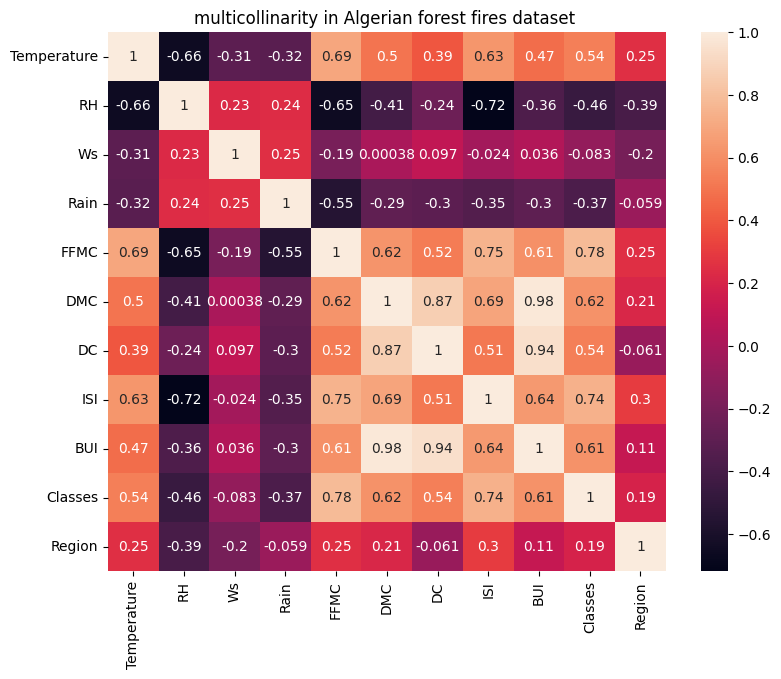

In [13]:
plt.figure(figsize=(9,7))
sns.heatmap(X_train.corr(),annot=True)
plt.title("multicollinarity in Algerian forest fires dataset ")

In [14]:
X_train.corr().columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [15]:
def corelation(dataset,threshold):
    """
    Objectives:
        Identifies sets of features in a dataset that have a correlation greater than the specified threshold.

    Parameters:
        dataset (pd.DataFrame): The dataset containing numerical features.
        threshold (float): The correlation threshold (absolute value) to filter feature sets.

    Returns:
        sets: A sets which contains features that are highly correlated.
    """
    col_cor=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_cor.add(colname)
    return col_cor

In [16]:
# threshold depends on domain expertise
corr_features=corelation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [17]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

#### Feature Scaling || Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [19]:
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

#### Box plots to understand effect of Standard Scaler 

#### Linear Regreesion Model

Simple Linear Regression

Mean Absolute Error: 0.546823646524997
R2 score: 0.9847657384266951


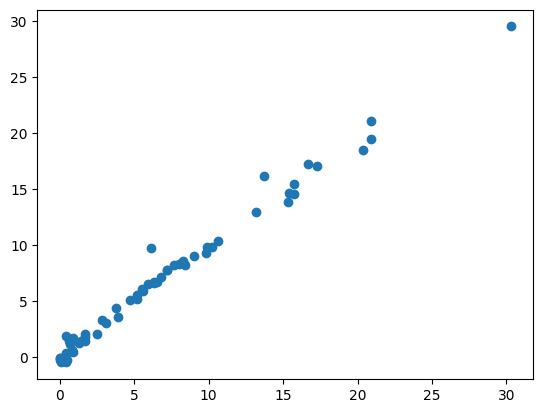

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg=LinearRegression()
linreg.fit(X_train_scaled,y_train)

y_pred=linreg.predict(X_test_scaled)

mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
score=r2_score(y_true=y_test,y_pred=y_pred)
print("Mean Absolute Error:",mae)
print("R2 score:",score)
plt.scatter(x=y_test,y=y_pred)

Lasso Linear Regression

Mean Absolute Error: 1.133175994914409
R2 score: 0.9492020263112388


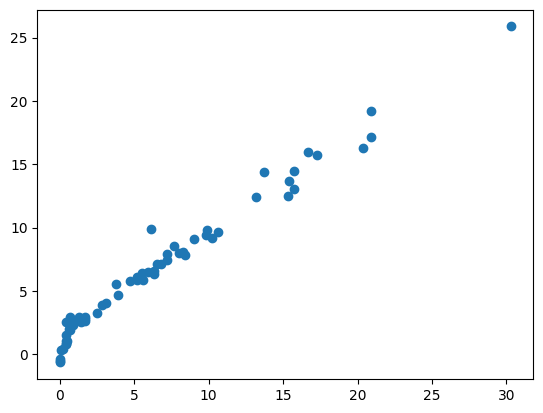

In [21]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

y_pred=lasso.predict(X_test_scaled)

mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
score=r2_score(y_true=y_test,y_pred=y_pred)
print("Mean Absolute Error:",mae)
print("R2 score:",score)
plt.scatter(x=y_test,y=y_pred)

Lasso Regression with  Cross validation

Mean Absolute Error: 0.6199701158263431
R2 score: 0.9820946715928275


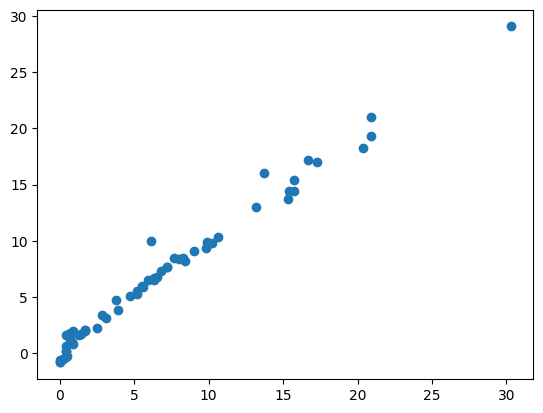

In [22]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, r2_score

lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

y_pred=lassocv.predict(X_test_scaled)

mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
score=r2_score(y_true=y_test,y_pred=y_pred)
print("Mean Absolute Error:",mae)
print("R2 score:",score)
plt.scatter(x=y_test,y=y_pred)

Ridge Regression

Mean Absolute Error: 0.5642305340105691
R2 score: 0.9842993364555513


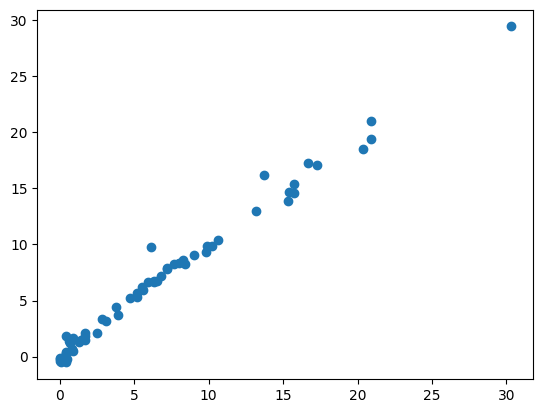

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

y_pred=ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
score=r2_score(y_true=y_test,y_pred=y_pred)
print("Mean Absolute Error:",mae)
print("R2 score:",score)
plt.scatter(x=y_test,y=y_pred)

Ridge Regression with  Cross validation

Mean Absolute Error: 0.5642305340105691
R2 score: 0.9842993364555513


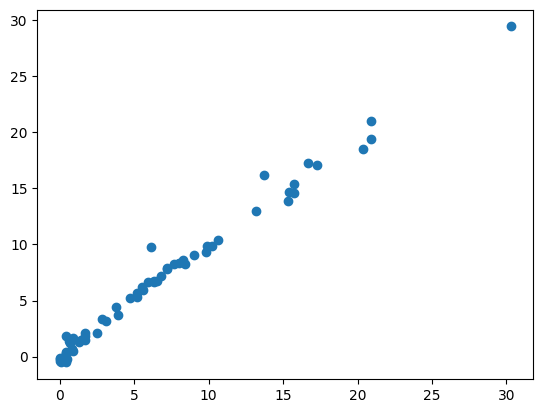

In [24]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score

ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

y_pred=ridgecv.predict(X_test_scaled)

mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
score=r2_score(y_true=y_test,y_pred=y_pred)
print("Mean Absolute Error:",mae)
print("R2 score:",score)
plt.scatter(x=y_test,y=y_pred)

In [25]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

ElasticNet

Mean Absolute Error: 1.8822353634896
R2 score: 0.8753460589519703


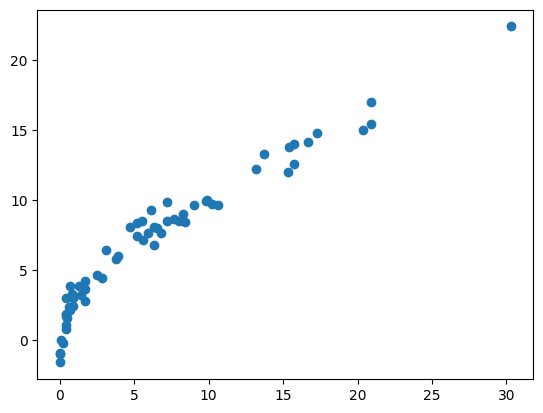

In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)

y_pred=elastic.predict(X_test_scaled)

mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
score=r2_score(y_true=y_test,y_pred=y_pred)
print("Mean Absolute Error:",mae)
print("R2 score:",score)
plt.scatter(x=y_test,y=y_pred)

ElasticNet Regression with  Cross validation

Mean Absolute Error: 0.6575946731430901
R2 score: 0.9814217587854941


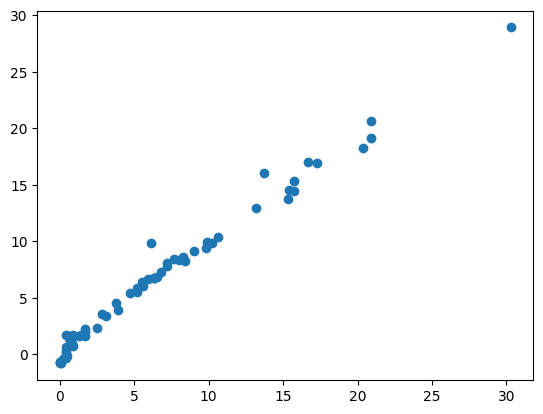

In [27]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score

elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)

y_pred=elasticcv.predict(X_test_scaled)

mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
score=r2_score(y_true=y_test,y_pred=y_pred)
print("Mean Absolute Error:",mae)
print("R2 score:",score)
plt.scatter(x=y_test,y=y_pred)

#### Pickle the preprocessing model- "Standard Scaler" and the ML model 

In [28]:
scaler

StandardScaler()

In [29]:
# pick the model with greater accuracy
ridge 

Ridge()

In [31]:
import pickle

pickle.dump(obj=scaler,file=open            (r'E:\MLopsProject\LinRegProject\model\scaler.pkl','wb'))

pickle.dump(obj=ridge,file=open(r'E:\MLopsProject\LinRegProject\model\ridge.pkl','wb'))

In [32]:
loaded_model=pickle.load(open(r'E:\MLopsProject\LinRegProject\model\ridge.pkl','rb'))
loaded_model

Ridge()

In [34]:
X_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
24,31,64,15,0.0,86.7,14.2,5.7,1,0
6,33,54,13,0.0,88.2,9.9,6.4,1,0
152,28,58,18,2.2,63.7,3.2,1.2,0,1
232,34,58,13,0.2,79.5,18.7,2.1,0,1
238,30,65,14,0.0,85.4,16.0,4.5,1,1
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,0,1
178,33,57,16,0.0,87.5,15.7,6.7,1,1
224,31,72,14,0.0,84.2,8.3,3.8,1,1
230,36,33,13,0.1,90.6,25.8,9.0,1,1


In [35]:
y_test

24      8.4
6       7.2
152     0.5
232     3.8
238     6.5
       ... 
162     0.8
178     9.0
224     3.9
230    15.4
154     5.2
Name: FWI, Length: 61, dtype: float64